In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
db = load_boston()


In [3]:
db.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
db.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
data = db.data

In [6]:
data.shape

(506, 13)

In [7]:
db.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

# Attribute Information (in order):

#### CRIM - per capita crime rate by town
#### ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#### INDUS - proportion of non-retail business acres per town
#### CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#### NOX - nitric oxides concentration (parts per 10 million)
#### RM - average number of rooms per dwelling
#### AGE - proportion of owner-occupied units built prior to 1940
#### DIS - weighted distances to five Boston employment centres
#### RAD - index of accessibility to radial highways
#### TAX - full-value property-tax rate per 10,000 dollars
#### B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#### LSTAT - percentage of lower status of the population
#### MEDV - Median value of owner-occupied homes in 1000's dollar

##### MEDV - Median value of owner-occupied homes in $1000s is missing in features and hence is the target

In [9]:
df = pd.DataFrame(data = data, columns = db.feature_names)
df['MEDV'] = db.target

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
sns.set_style('whitegrid')

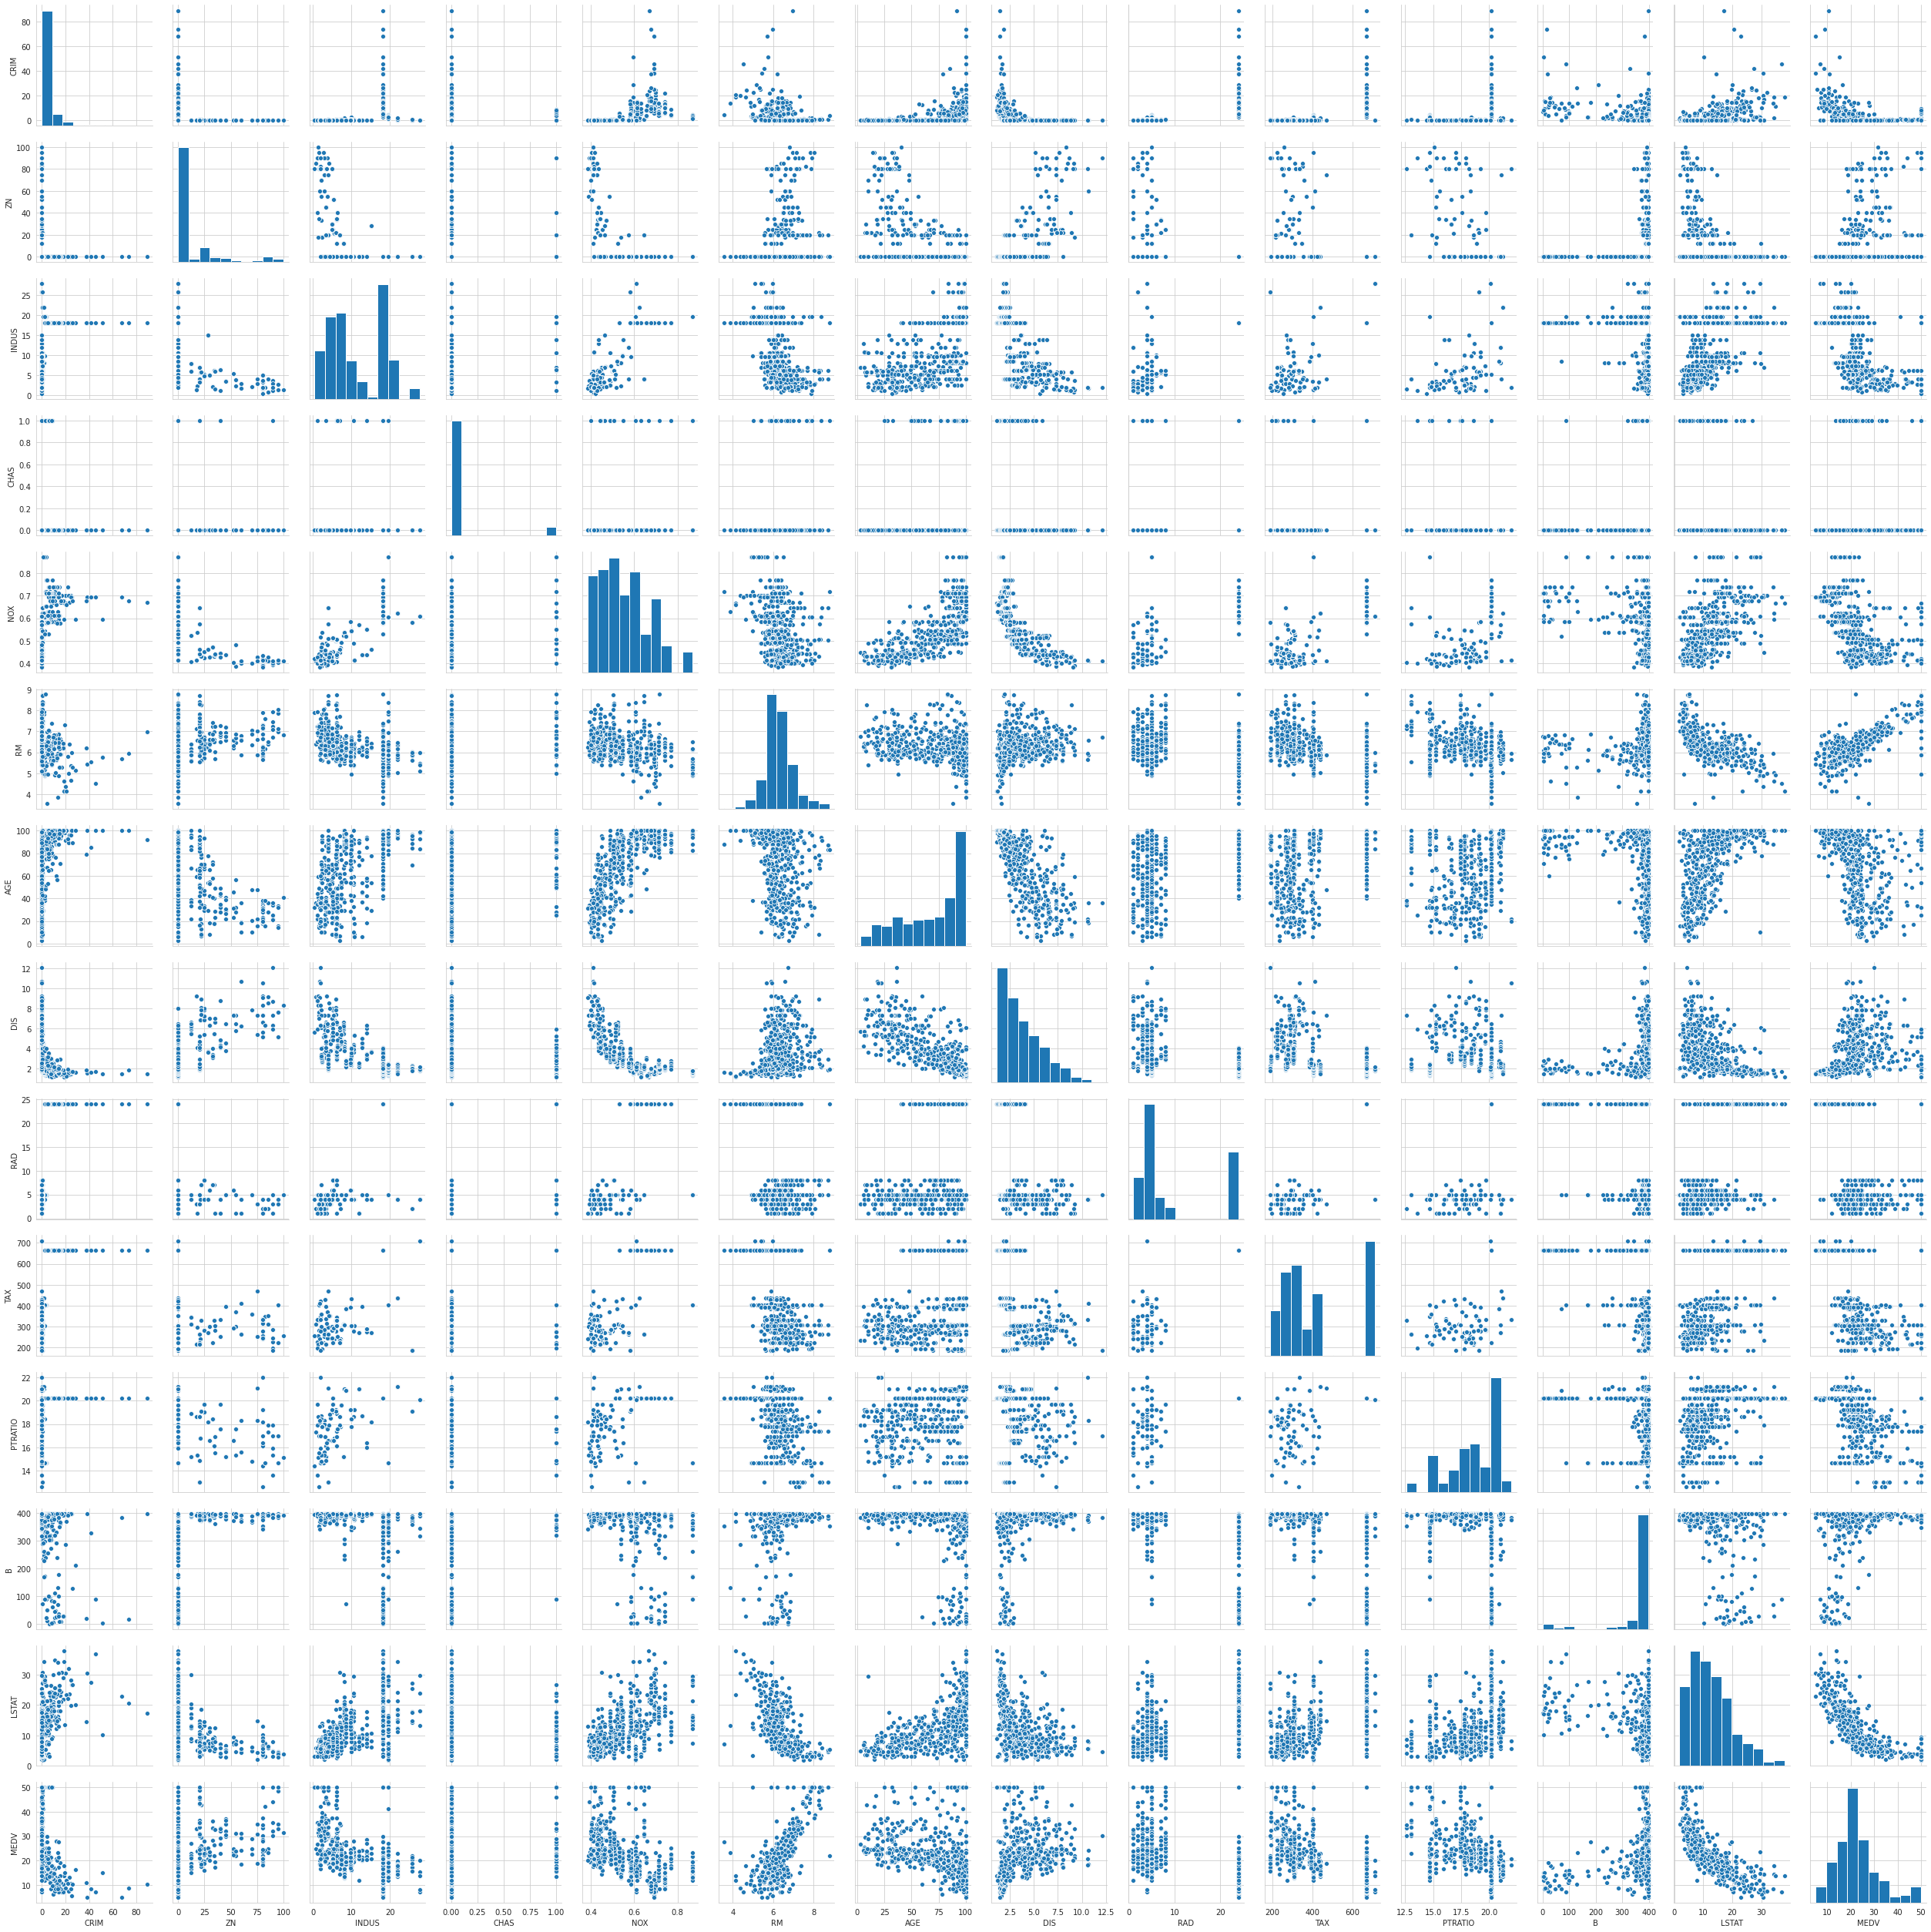

In [15]:
sns.pairplot(df)

<AxesSubplot:xlabel='MEDV'>

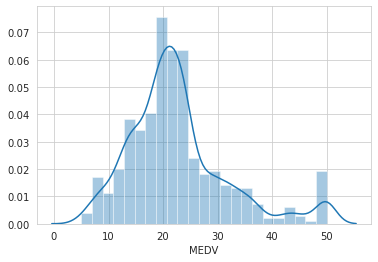

In [16]:
sns.distplot(df['MEDV'])

In [17]:
correlation = df.corr().round(2)

In [18]:
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


<AxesSubplot:>

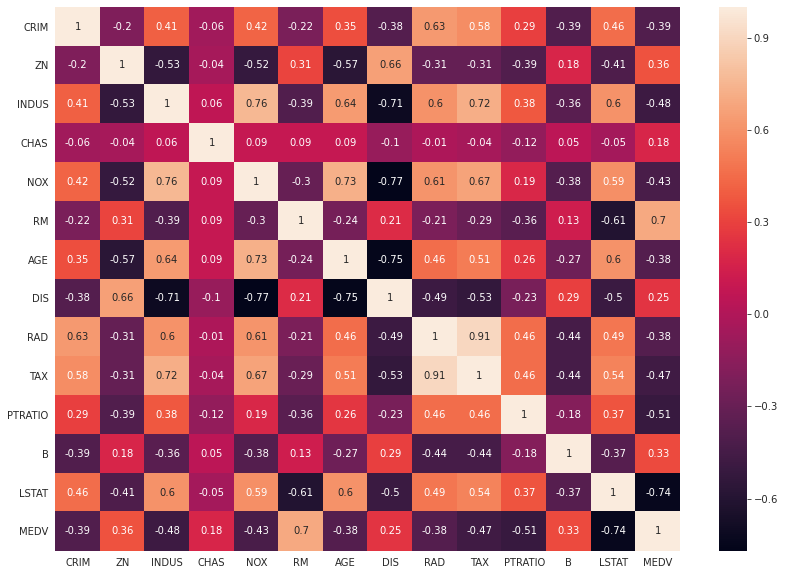

In [19]:
fig, ax = plt.subplots(figsize = (14,10))
sns.heatmap(correlation,annot = True, annot_kws={'size':10})

#### From this we can observe that RM and LSTAT have correlation close to 1 or -1 with target MEDV

In [20]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [21]:
x = df[['RM', 'LSTAT']]
y = df['MEDV']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [23]:
linear = LinearRegression()

In [24]:
linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
predictx = linear.predict(x_test)

In [26]:
predictx

array([25.17460573, 16.71013489, 32.75823867, 28.51384222,  1.1661344 ,
        1.76342521, 26.29286816, 30.18496784, 21.65177824, 20.7294596 ,
       28.66712954, 25.94945238, 23.5858405 , 16.17268448, 17.12679287,
       25.50406124, 15.98545501, 12.44286021, 12.18579809, 19.77857448,
       26.57530702, 21.24532367, 29.98658999, 21.58406063, 21.50408905,
       19.13913476, 35.6316934 , 31.30900336, 32.4049547 , 24.50473525,
       18.44485473, 24.41268163, 30.09299039, 27.87681657, 13.19308313,
       16.63467846, 11.52036396, 22.60309473, 22.91939655, 23.39024627,
       26.07666912, 13.41818013, 30.98743901,  4.11433476, 23.56599702,
       20.35255305, 33.36656247, 19.523529  , 29.03865214, -0.09425   ,
       29.11196788, 24.56502964,  6.42254523, 31.19843472, 19.57603971,
       23.40095195, 22.01448469, 17.39201689, 18.29657617, 17.91411371,
       17.95986978, 25.56572935, 17.85410401, 28.64898669, 30.27180115,
       26.79075303, 35.98820932, 27.18061305, 12.66486063, 26.26

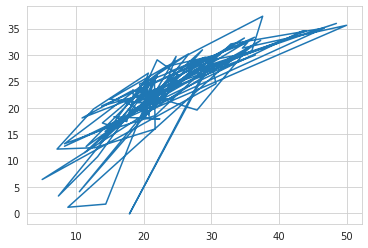

In [27]:
plt.plot(y_test, predictx)

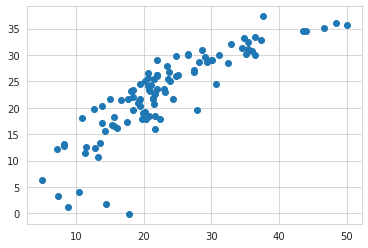

In [28]:
plt.scatter(y_test, predictx)

In [29]:
mean_squared_error(y_test,predictx)

23.633526889625085

In [30]:
np.sqrt(mean_squared_error(y_test,predictx))

4.8614325964292755